In [18]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular
from sklearn.utils import shuffle

In [19]:
df_einfach = pd.read_pickle('einfach.pkl') 
df_schwer = pd.read_pickle('schwer.pkl') 

df_data = pd.concat([df_einfach, df_schwer])
df = shuffle(df_data)

In [20]:
#remove scroll
df_data_without_scroll = df.loc[df["type"] !="scroll"]

In [21]:
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param dtf: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
def utils_recognize_type(df, col, max_cat=20):
    if (df_data_without_scroll[col].dtype == "TestEinfach") | (df_data_without_scroll[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

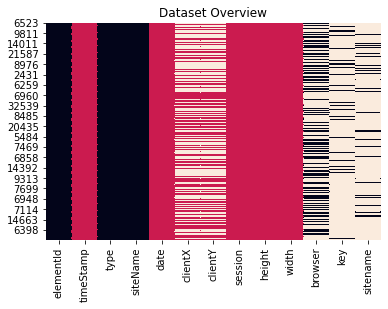

 Categerocial   Numeric   NaN 


In [22]:
dic_cols = {col:utils_recognize_type(df_data_without_scroll, col, max_cat=20) for col in df.columns}
heatmap = df_data_without_scroll.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

In [23]:
df_data_without_scroll = df_data_without_scroll.set_index("session")
df_data_without_scroll = df_data_without_scroll.rename(columns={"siteName":"Y"})

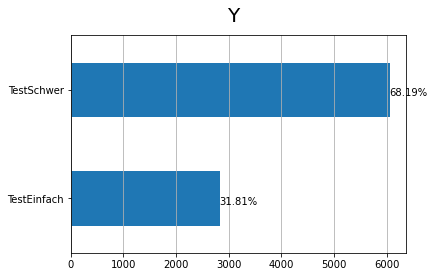

In [24]:
y = "Y"
ax = df_data_without_scroll[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()